In [1]:
from packages import *
import numpy as np, matplotlib.pyplot as plt, matplotlib.patches as patches, matplotlib.cm as cm
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL import Image 
from collections import Counter
%load_ext autoreload
%autoreload 2

# Balancing
Due to the severe imbalances in the DeepFashion dataset, training a model proves quite difficult as the optimization quickly converges on a lazy solution where it assigns no attributes to clothes and picks the mod of the the dataset for clothing category and clothing category type.

Also, eventually this model will be for me and for my needs, therefore I will hand-pick the categories that I wear in my daily life as well as some of the attributes that matter to me.

In [2]:
img_cat = load_pickle(os.path.join(LINK_DIR, 'img_cat.pkl'))
img_attr = load_pickle(os.path.join(LINK_DIR, 'img_attr.pkl'))
cat_types = load_pickle(os.path.join(LINK_DIR, 'cat_types.pkl'))

In [3]:
cat_str = load_pickle(os.path.join(LINK_DIR, 'cat_str.pkl'))
attr_str = load_pickle(os.path.join(LINK_DIR, 'attr.pkl'))
cat_types_str = load_pickle(os.path.join(LINK_DIR, 'cat_types_str.pkl'))

In [4]:
N = 0
cat_dist = {cat_str[i]: 0 for i in cat_str}
for folder in img_cat:
    for img_name in img_cat[folder]:
        c = img_cat[folder][img_name]
        cat_dist[cat_str[c]] += 1
        N+=1

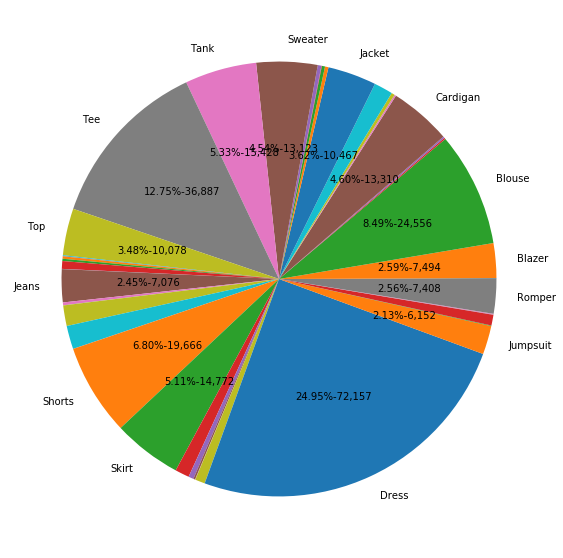

In [5]:
plt.rcParams["figure.figsize"] = [10.0, 10.0]
plt.pie(cat_dist.values(), labels=make_labels(cat_dist.values(), list(cat_dist.keys()), 2), autopct=make_autopct(cat_dist.values(), 2))
plt.rcParams["figure.figsize"] = [6.0, 6.0]

In [6]:
cats_to_keep={'Tee', 'Cardigan', 'Sweatpants', 'Shorts', 'Jeans', 'Top', 'Blazer', 'Sweater', 'Jacket', 'Tank', 'Hoodie', 'Joggers'}
cats_to_keep = {i:cat_dist[i] for i in cats_to_keep}

Picked 12 classes: 145,044 examples remain (out of 289,222, 50.15%)


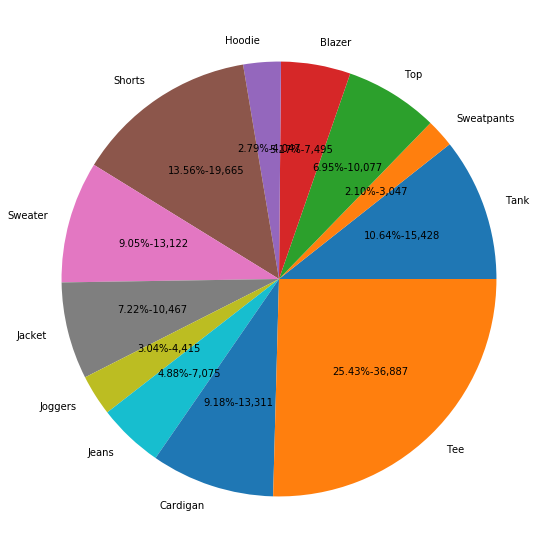

In [7]:
plt.rcParams["figure.figsize"] = [10.0, 10.0]
plt.pie(cats_to_keep.values(), labels=cats_to_keep.keys(), autopct=make_autopct(cats_to_keep.values(), 2))
plt.rcParams["figure.figsize"] = [6.0, 6.0]
left_cat = sum(cats_to_keep.values())
print('Picked {} classes: {:,d} examples remain (out of {:,d}, {:.2f}%)'.format(len(cats_to_keep), left_cat, N, 100*left_cat/N ))

Picked 12 classes: 145,044 examples remain (out of 289,222, 50.15%)


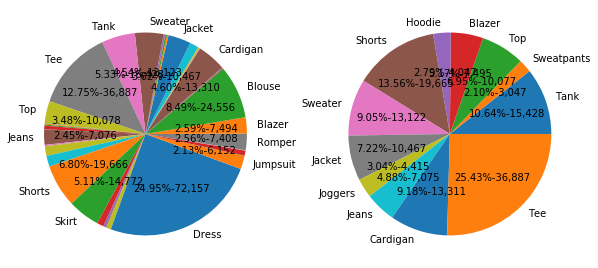

In [11]:
plt.rcParams["figure.figsize"] = [10.0, 10.0]
fig, axes = plt.subplots(1, 2)
_=axes[0].pie(cat_dist.values(), labels=make_labels(cat_dist.values(), list(cat_dist.keys()), 2), autopct=make_autopct(cat_dist.values(), 2))
_=axes[1].pie(cats_to_keep.values(), labels=cats_to_keep.keys(), autopct=make_autopct(cats_to_keep.values(), 2))
print('Picked {} classes: {:,d} examples remain (out of {:,d}, {:.2f}%)'.format(len(cats_to_keep), left_cat, N, 100*left_cat/N ))

Now, let's look at the attribute distribution of the selected categories.

In [13]:
attr_dist = {i: 0 for i in attr_str}
for folder in img_cat:
    for img_name in img_cat[folder]:
        c = cat_str[img_cat[folder][img_name]]
        if c not in cats_to_keep: continue
        attr = img_attr[folder][img_name]
        found = attr_str[np.where(attr)[0]]
        for a in found:
            attr_dist[a]+=1

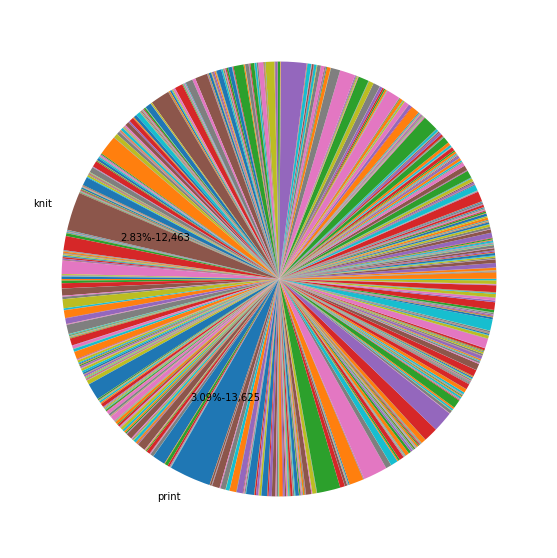

In [167]:
plt.rcParams["figure.figsize"] = [10.0, 10.0]
plt.pie(attr_dist.values(), labels=make_labels(attr_dist.values(), list(attr_dist.keys()), 2), autopct=make_autopct(attr_dist.values(), 2))
plt.rcParams["figure.figsize"] = [6.0, 6.0]

In [14]:
print([a for a in attr_str if attr_dist[a] > N/50])

['denim', 'floral', 'graphic', 'knit', 'print', 'shirt', 'sleeve', 'striped']


In [15]:
attrs_to_keep = {'boxy', 'classic', 'collar', 'button', 'crew', 'crew neck', 'crochet', 'denim', 'distressed', 'fit', 
                 'floral', 'fur', 'graphic', 'hooded', 'knit', 'leather', 'linen', 'loose', 
                 'muscle', 'pattern', 'abstract', 'print', 'pullover', 'sleeve', 'slim', 'stripe', 'striped', 'textured', 'v-neck', 
                 'woven', 'zip', 'cotton'}
attrs_to_keep = {i:attr_dist[i] for i in attrs_to_keep}

Picked 32 attributes: 90,010 examples remain (out of 289,222, 31.12%)


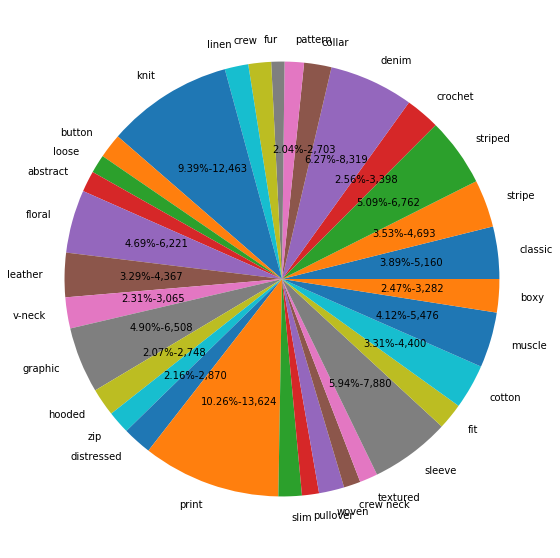

In [16]:
plt.rcParams["figure.figsize"] = [10.0, 10.0]
plt.pie(attrs_to_keep.values(), labels=attrs_to_keep.keys(), autopct=make_autopct(attrs_to_keep.values(), 2))
plt.rcParams["figure.figsize"] = [6.0, 6.0]
left_attr = 0
for folder in img_cat:
    for img_name in img_cat[folder]:
        c = cat_str[img_cat[folder][img_name]]
        if c not in cats_to_keep: continue
        attr = img_attr[folder][img_name]
        found = attr_str[np.where(attr)[0]]
        for a in found:
            if a in attrs_to_keep:
                left_attr+=1
                break
print('Picked {} attributes: {:,d} examples remain (out of {:,d}, {:.2f}%)'.format(len(attrs_to_keep), left_attr, N, 100*left_attr/N ))

Picked 32 attributes: 90,010 examples remain (out of 289,222, 31.12%)


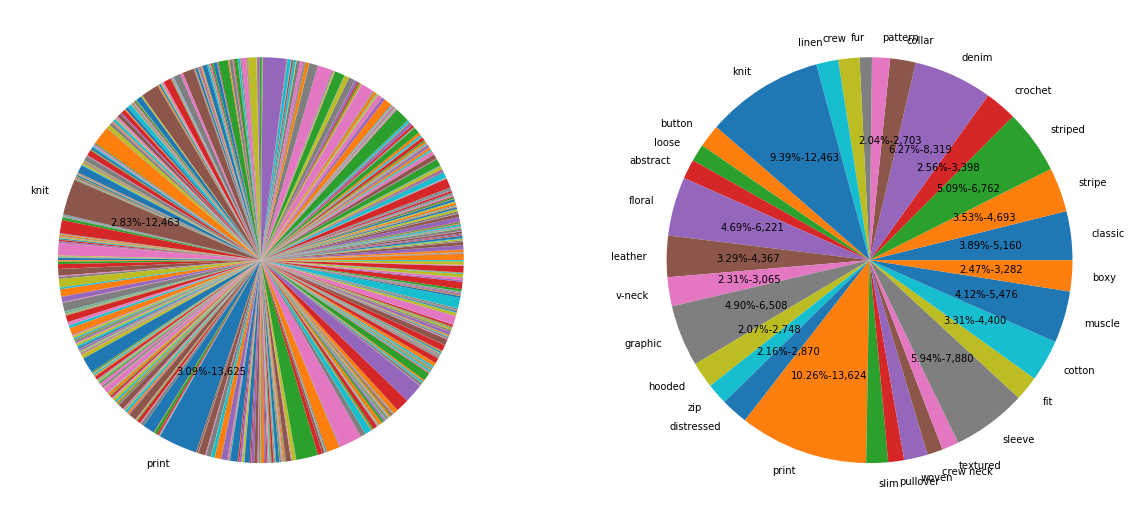

In [18]:
plt.rcParams["figure.figsize"] = [20.0, 20.0]
fig, axes = plt.subplots(1, 2)
_=axes[1].pie(attrs_to_keep.values(), labels=attrs_to_keep.keys(), autopct=make_autopct(attrs_to_keep.values(), 2))
_=axes[0].pie(attr_dist.values(), labels=make_labels(attr_dist.values(), list(attr_dist.keys()), 2), autopct=make_autopct(attr_dist.values(), 2))
print('Picked {} attributes: {:,d} examples remain (out of {:,d}, {:.2f}%)'.format(len(attrs_to_keep), left_attr, N, 100*left_attr/N ))

In [171]:
cat_type_dist = {cat_types_str[i]: 0 for i in cat_types_str}
for folder in img_cat:
    for img_name in img_cat[folder]:
        c = img_cat[folder][img_name]
        if cat_str[c] not in cats_to_keep: continue
        attr = img_attr[folder][img_name]
        found = attr_str[np.where(attr)[0]]
        for a in found:
            if a in attrs_to_keep:
                cat_type_dist[cat_types_str[cat_types[c]]]+=1
                break

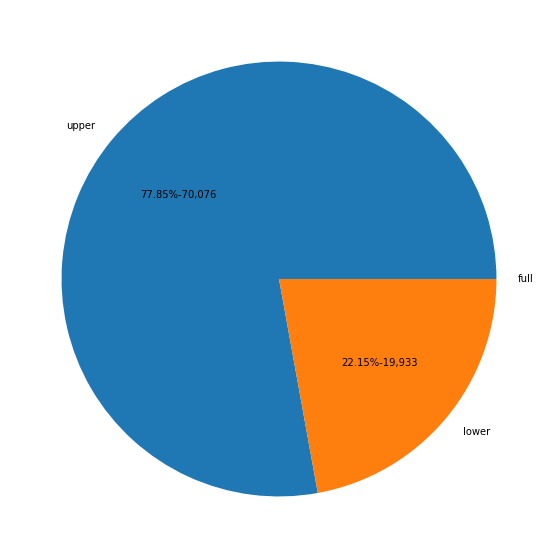

In [172]:
plt.rcParams["figure.figsize"] = [10.0, 10.0]
plt.pie(cat_type_dist.values(), labels=cat_type_dist.keys(), autopct=make_autopct(cat_type_dist.values(), 2))
plt.rcParams["figure.figsize"] = [6.0, 6.0]

Now, we have a much more balanced dataset with about 90k images. Let's export the names of the images that we will be using.

In [173]:
partition_balanced = []
for folder in img_cat:
    for img_name in img_cat[folder]:
        c = img_cat[folder][img_name]
        if cat_str[c] not in cats_to_keep: continue
        attr = img_attr[folder][img_name]
        found = attr_str[np.where(attr)[0]]
        for a in found:
            if a in attrs_to_keep:
                partition_balanced.append((folder, img_name))
                break
print('{:,d} examples found'.format(len(partition_balanced)))

90,010 examples found


In [174]:
partition_balanced = shuffle(partition_balanced)

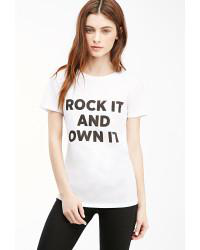

Tee
['audrey' 'graphic' 'sweet']


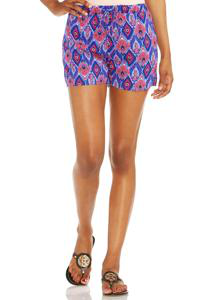

Shorts
['drawstring' 'floral' 'floral paisley' 'paisley']


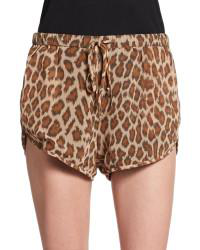

Shorts
['animal' 'animal print' 'print']


In [175]:
for folder, img_name in partition_balanced[:3]:
    img = Image.open(os.path.join(IMG_DIR, folder, img_name))
    display(img)
    print(cat_str[img_cat[folder][img_name]])
    print(attr_str[np.where(img_attr[folder][img_name])[0]])

We can also for simplicity, create new dictionaries for the category & attribute labels.

In [195]:
cat_str_balanced = {i: v for i,v  in enumerate(cats_to_keep)}
cat_str_inv_balanced = {value: key for key, value in cat_str_balanced.items()}

In [197]:
cat_str_inv_balanced

{'Shorts': 0,
 'Jeans': 1,
 'Top': 2,
 'Tank': 3,
 'Jacket': 4,
 'Tee': 5,
 'Joggers': 6,
 'Sweatpants': 7,
 'Blazer': 8,
 'Cardigan': 9,
 'Hoodie': 10,
 'Sweater': 11}

In [193]:
attr_str_balanced = np.array([v for i,v  in enumerate(attrs_to_keep)])

In [194]:
attr_str_balanced

array(['knit', 'loose', 'pattern', 'pullover', 'leather', 'woven', 'fur',
       'crew', 'button', 'sleeve', 'zip', 'abstract', 'textured',
       'stripe', 'collar', 'floral', 'linen', 'classic', 'graphic',
       'muscle', 'hooded', 'boxy', 'print', 'striped', 'denim',
       'distressed', 'slim', 'crew neck', 'cotton', 'crochet', 'v-neck',
       'fit'], dtype='<U10')

In [206]:
img_attr_balanced = {}
img_cat_balanced = {}
for folder, img_name in partition_balanced:
    c = cat_str[img_cat[folder][img_name]]
    if c not in cats_to_keep: 
        print('help')
    path = os.path.join(folder, img_name)
    attr = img_attr[folder][img_name]
    found = attr_str[np.where(attr)[0]]
    attr_balanced = np.array([int(a in found) for a in attr_str_balanced])
    cat_balanced = cat_str_inv_balanced[c]
#     break
    img_attr_balanced[path] = attr_balanced
    img_cat_balanced[path] = cat_balanced


In [213]:
assert len(partition_balanced) == len(img_attr_balanced) == len(img_cat_balanced)

In [219]:
save_pickle(img_cat_balanced, os.path.join(LINK_DIR, 'img_cat_balanced.pkl'))
save_pickle(img_attr_balanced, os.path.join(LINK_DIR, 'img_attr_balanced.pkl'))
save_pickle(attr_str_balanced, os.path.join(LINK_DIR, 'attr_str_balanced.pkl'))
save_pickle(cat_str_balanced, os.path.join(LINK_DIR, 'cat_str_balanced.pkl'))

In [225]:
partition_balanced = [os.path.join(folder, img_name) for folder, img_name in partition_balanced]

Let's define the train, val, test splits using a 80:10:10 ratios

In [229]:
train, val_test = train_test_split(partition_balanced, test_size =.2)

In [231]:
val, test = train_test_split(val_test, test_size =.5)

In [233]:
total = len(train) + len(val) + len(test)

In [234]:
assert total == len(partition_balanced)

In [237]:
print('{:.1f}:{:.1f}:{:.1f}'.format( 100 * len(train)/total, 100* len(val)/total, 100*len(test)/total))

80.0:10.0:10.0


In [238]:
partition_balanced = {'train': train, 'val': val, 'test': test}

In [239]:
save_pickle(partition_balanced, os.path.join(LINK_DIR, 'partition_balanced.pkl'))